In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper')

# Topic modeling

In [ ]:
import string
BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'

def simple_preproc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

with open(BASE_PATH + 'text_news_nne/text_news_2001.txt') as read_file:
  sentences2001 = [simple_preproc(k).lower().split() for k in read_file.readlines()]

In [ ]:
# deleted <p> that indicate the start of a paragraph

for i in (range(len(sentences2001))):
  count = sentences2001[i].count('p')
  if(count > 0):
    for j in range(count):
      sentences2001[i].remove('p')
      # print(i)
  else:
    sentences2001[i]

# deleted s

for i in (range(len(sentences2001))):
  count = sentences2001[i].count('s')
  if(count > 0):
    for j in range(count):
      sentences2001[i].remove('s')
      # print(i)
  else:
    sentences2001[i]


# deleted 's

for i in (range(len(sentences2001))):
  count = sentences2001[i].count('\'s')
  if(count > 0):
    for j in range(count):
      sentences2001[i].remove('\'s')
      # print(i)
  else:
    sentences2001[i]

In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')

all_stopwords = set(sp.Defaults.stop_words)
stop_word = sentences2001.copy()
important_words = stop_word.copy()
for i in (range(len(stop_word))):
  stop_word[i] = [i for i in sentences2001[i] if str(i).lower() not in all_stopwords]
  important_words[i] = [i for i in stop_word[i] if i.isalpha()]

In [ ]:
# create a new list called my_new_list
my_new_list = []
# Next we want to iterate over the outer list
for sub_list in important_words:
    # Now go over each item of the sublist
    for item in sub_list:
        # append it to our new list
        my_new_list.append(item)


lista_vuota = ['1']
nuova_lista = []
nuova_lista.append(lista_vuota)
nuova_lista.append(my_new_list)

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(nuova_lista)

# Create Corpus
texts = nuova_lista.copy()

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from pprint import pprint
import gensim

# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.005*"said" + 0.005*"nt" + 0.004*"says" + 0.004*"new" + 0.003*"time" + '
  '0.003*"year" + 0.003*"years" + 0.003*"people" + 0.002*"like" + '
  '0.002*"percent"'),
 (1,
  '0.013*"said" + 0.006*"nt" + 0.005*"says" + 0.004*"people" + 0.004*"new" + '
  '0.003*"like" + 0.003*"time" + 0.003*"years" + 0.003*"year" + 0.002*"mr"'),
 (2,
  '0.009*"nt" + 0.006*"said" + 0.004*"new" + 0.004*"says" + 0.004*"time" + '
  '0.004*"people" + 0.003*"like" + 0.003*"year" + 0.003*"years" + '
  '0.002*"percent"'),
 (3,
  '0.010*"said" + 0.006*"nt" + 0.005*"new" + 0.005*"says" + 0.003*"years" + '
  '0.003*"people" + 0.003*"year" + 0.003*"like" + 0.002*"state" + '
  '0.002*"time"'),
 (4,
  '0.009*"said" + 0.005*"nt" + 0.004*"new" + 0.003*"people" + 0.003*"time" + '
  '0.003*"like" + 0.003*"years" + 0.003*"says" + 0.003*"year" + 0.002*"mr"'),
 (5,
  '0.009*"said" + 0.008*"nt" + 0.005*"says" + 0.004*"people" + 0.004*"like" + '
  '0.004*"new" + 0.003*"time" + 0.003*"years" + 0.002*"year" + 0.002*"mr"'),


# PRE-PROCESSING

## Selection of articles that contain at least one keyword

In [ ]:
!pip install -U word_forms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from word_forms.word_forms import get_word_forms
import nltk
nltk.download('omw-1.4')

# generate all possible forms of keywords
# keyword_list = ['bin laden', 'al qaeda', 'world trade center', 'twin towers', 'attack', 'hijack', 'firefighter', 'airplane', 'terrorism', 'afghanistan', 'jihad', 'islam']
word_form_tower = get_word_forms("tower")
word_form_attack = get_word_forms("attack")
word_form_hijack = get_word_forms("hijack")
word_form_firefighter = get_word_forms("firefighter")
word_form_airplane = get_word_forms("airplane")
word_form_terrorism = get_word_forms("terrorism")


word_form_tot = (list(list(word_form_tower['a']) + list(word_form_tower['n']) + 
list(word_form_tower['v']) + list(word_form_tower['r']) + 
list(word_form_attack['a']) + list(word_form_attack['n']) + 
list(word_form_attack['v']) + list(word_form_attack['r']) + 
list(word_form_airplane['a']) + list(word_form_airplane['n']) + 
list(word_form_airplane['v']) + list(word_form_airplane['r']) + 
list(word_form_hijack['a']) + list(word_form_hijack['n']) + 
list(word_form_hijack['v']) + list(word_form_hijack['r']) + 
list(word_form_firefighter['a']) + list(word_form_firefighter['n']) + 
list(word_form_firefighter['v']) + list(word_form_firefighter['r']) + 
list(word_form_terrorism['a']) + list(word_form_terrorism['n']) + 
list(word_form_terrorism['v']) + list(word_form_terrorism['r'])))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# word_form_tot

In [ ]:
# import string
import re

BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'

with open(BASE_PATH + 'text_news_nne/text_news_2001.txt') as read_file:
  sentences2001 = read_file.readlines()
  
  #define the list of words of our interest
  keywords = ['bin laden', 'al qaeda', 'twin towers', 'world trade center', 'afghanistan', 'jihad', 'islam']
  
  keyword_list = keywords + word_form_tot

  #define the dictionary where we store the articles
  articles = {}
  art = {}
  #remove the p that represent in html the start of the paragraph
  for symbol in sentences2001:
    symbol = symbol.replace('<p>', '')
    #selection of articles that contain the keywords
    for keyword in keyword_list:
      if (keyword in symbol.lower()):
        #select id of the article that contains at least one kwyword 
        id = re.findall(r'@@(\w+)', symbol)[0]
        articles[id] = symbol.lower()
        art[id] = symbol.lower()

print(len(articles))

1489


In [ ]:
#check if list of articles contains duplicates by their id

def check_duplicate(l):
    mySet = set(l)
    if len(mySet) == len(l):
        print("List has no duplicate elements.")
    else:
        print("The list contains duplicate elements")

check_duplicate(articles.keys())

List has no duplicate elements.


## Tokenization & stop-word removal

Dictionary for every article that contains the keywords

In [ ]:
import spacy
import nltk
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

for id in articles:
  #tokenization
  token_sentences2001 = articles[id].split()

  #stop-word removal
  stop_word = [i for i in token_sentences2001 if str(i).lower() not in all_stopwords]
  words = [i for i in stop_word if i.isalpha()]

  #save the list of words in the dictionary
  articles[id] = words

In [ ]:
# dictionaries with count of bigrams and unigrams
unigram_dict = {}
bigram_dict = {}

for id in articles:
  for i in range(len(articles[id])):
    unigram = articles[id][i]
    if unigram not in unigram_dict.keys():
      unigram_dict[unigram] = 1
    else:
      unigram_dict[unigram] = unigram_dict[unigram] + 1
  for i in range(len(articles[id])-1):
    bigram = articles[id][i] + ' ' + articles[id][i+1]
    if bigram not in bigram_dict.keys():
      bigram_dict[bigram] = 1
    else:
      bigram_dict[bigram] = bigram_dict[bigram] + 1

# GEEKS FOR GEEKS
# def prepare_data_for_training(sentences,w2v):
#     data = {}
#     for sentence in sentences:
#         for word in sentence:
#             if word not in data:
#                 data[word] = 1
#             else:
#                 data[word] += 1

In [ ]:
bigram_dict_value = {}
discount_factor = 6

for bigram in bigram_dict:
  unigram_number = []
  words_list = bigram.split()
  bigram_number = bigram_dict[bigram]
  
  for word in words_list:
    unigram_count = unigram_dict[word]
    unigram_number.append(unigram_count)
  
  try:
    score = (bigram_number-discount_factor)/((unigram_number[0]-bigram_number)*(unigram_number[1]-bigram_number))
  except ZeroDivisionError:
    score = 0
  
  bigram_dict_value[bigram] = score

In [ ]:
threshold = 1
word_prases_dict = {b: val for b, val in bigram_dict_value.items() if val >= threshold}

In [ ]:
word_prases_dict

{'bin laden': 1.5162790697674418,
 'boca raton': 12.0,
 'cate blanchett': 1.0,
 'hammacher schlemmer': 1.0,
 'hong kong': 1.6,
 'houghton mifflin': 1.0,
 'jenni girtman': 1.0,
 'juliette binoche': 2.0,
 'kentuck knob': 1.4,
 'los angeles': 1.0740740740740742,
 'mclennan cos': 2.0,
 'notre dame': 2.4,
 'olde towne': 1.1333333333333333,
 'palo alto': 2.1666666666666665,
 'tora bora': 1.8571428571428572,
 'ziad jarrah': 1.5}

In [ ]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

cont = 0
support_dict = {}

for id in art:
  #tokenization
  token_sentences2001_art = art[id].split()

  #stop-word removal
  stop_word_art = [i for i in token_sentences2001_art if str(i).lower() not in all_stopwords]
  words_art = [i for i in stop_word_art if i.isalpha() or i == "."]
  
  art[id] = words_art

  # bigrams = list(nltk.ngrams(words_art,2))
  # trigrams = list(nltk.ngrams(words_art,3))
  # n_most_common = 0 #how many of the most common n-grams do you want, zero indicates only the user_grams.
  # fdist_bigrams = nltk.FreqDist(bigrams).most_common(n_most_common) #n most common bigrams
  # fdist_trigrams = nltk.FreqDist(trigrams).most_common(n_most_common) #n most common trigrams
  # fdist_bigrams=[x[0][0]+' '+x[0][1] for x in fdist_bigrams]
  # fdist_trigrams=[x[0][0]+' '+x[0][1]+' '+x[0][2] for x in fdist_trigrams]
  # n_grams=fdist_bigrams
  # n_grams.extend(fdist_trigrams)

  user_grams = ['bin laden', 'al qaeda', 'world trade center', 'twin towers', 'white house', 'president bush', 'bay area']

  i=0
  support_dict[id] = []
  #check if 
  # - word in position i + space + word in position i+1 + space + word in position i+2 is a word in user_grams (world trade center)
  # - word in position i + space + word in position i+1 + space is a word in user_grams (ex. bin + ' ' + laden)
  # and create a unique term in the vocabulary (ex. bin-laden)
  # otherwise leave the single word 
  while i < len(art[id])-1:
    try:
      if (art[id][i] + ' ' + art[id][i+1] + ' ' + art[id][i+2] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1] + '-' + art[id][i+2])
        i = i + 3
      elif(art[id][i] + ' ' + art[id][i+1] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1])
        i = i + 2
      else:
        support_dict[id].append(art[id][i])
        i = i + 1
    except:
      if(art[id][i] + ' ' + art[id][i+1] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1])
        i = i + 2
      else:
        support_dict[id].append(art[id][i])
        i = i + 1
      pass
    # print(i, 'out of', len(art[id]))

# just to know how many articles have been checked
  cont = cont + 1
  print(cont)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# def save_dict_to_file(dic):
#     f = open('dict01.txt','w')
#     f.write(str(dic))
#     f.close()

# save_dict_to_file(support_dict)

In [ ]:
# def load_dict_from_file():
#     f = open('dict01.txt','r')
#     data=f.read()
#     f.close()
#     return eval(data)

# dictionary2001 = load_dict_from_file()

In [ ]:
def splitt(sequence, sep):
    chunk = []
    for val in sequence:
        if val == sep:
            yield chunk
            chunk = []
        else:
            chunk.append(val)
    yield chunk

In [ ]:
#creation of list of sentences that will be passed to Word2Vec

listWord2Vec = []
for id in support_dict:
  res = splitt(support_dict[id], '.')
  for x in res:
    listWord2Vec.append(x)
  # listWord2Vec.remove([])

print(len(listWord2Vec))

153850


## Lemmatization --- NON FATTA

In [ ]:
# we don't do this

# nlp = spacy.load('en_core_web_sm') #, disable=['parser', 'ner']


# doc = stop_word.copy()
# lemma_list = stop_word.copy()
# for i in range(len(stop_word)):
#   doc[i] = nlp(str(stop_word[i]))
#   lemma_list[i] = list([token.lemma_ for token in doc[i] if (not token.is_punct)])

# WORD2VEC

## Model

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(listWord2Vec, min_count=15, size=300, sg=1, iter=5)

# model.save('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/word2vec-2001.model')

# model.train(listWord2Vec, total_examples=100000, epochs=30, report_delay=1)
# vocabulary = list(model.wv.vocab)

## Most similar to

In [ ]:
model.wv.most_similar("al-qaeda")

[('bin-laden', 0.9079315662384033),
 ('usama', 0.8665414452552795),
 ('suspected', 0.8413771390914917),
 ('osama', 0.8409606218338013),
 ('sudan', 0.8333874940872192),
 ('lieutenants', 0.8287482857704163),
 ('commanders', 0.8243829011917114),
 ('fighters', 0.8237083554267883),
 ('capture', 0.8207718133926392),
 ('saudi', 0.8199291825294495)]

In [ ]:
model.wv.most_similar("bin-laden")

[('osama', 0.925920844078064),
 ('al-qaeda', 0.9079316258430481),
 ('mastermind', 0.8245646953582764),
 ('usama', 0.8227827548980713),
 ('terrorist', 0.8098272085189819),
 ('capture', 0.8033246994018555),
 ('lieutenants', 0.7966811060905457),
 ('whereabouts', 0.7947824001312256),
 ('believed', 0.7900751233100891),
 ('regime', 0.7880929708480835)]

In [ ]:
model.wv.most_similar("airplane")

[('cockpit', 0.8784680962562561),
 ('slammed', 0.8745114803314209),
 ('crashing', 0.8719735145568848),
 ('twin-towers', 0.8638107776641846),
 ('bound', 0.8633315563201904),
 ('crashes', 0.8604509234428406),
 ('cab', 0.8579989671707153),
 ('stranded', 0.8567971587181091),
 ('controller', 0.8487788438796997),
 ('airplanes', 0.8457369208335876)]

In [ ]:
model.wv.most_similar("twin-towers")

[('towers', 0.9218716621398926),
 ('slammed', 0.9053021669387817),
 ('world-trade-center', 0.9015346765518188),
 ('airplanes', 0.8948438167572021),
 ('bomb', 0.8895165920257568),
 ('explosions', 0.8894438743591309),
 ('hijacked', 0.8881988525390625),
 ('bomber', 0.8850720524787903),
 ('jetliner', 0.8842657804489136),
 ('blast', 0.8832496404647827)]

In [ ]:
model.wv.most_similar("tower")

[('hyatt', 0.8500936627388),
 ('sears', 0.8295668363571167),
 ('floors', 0.8290119171142578),
 ('midtown', 0.8231461048126221),
 ('towers', 0.8142000436782837),
 ('terminal', 0.8114408254623413),
 ('elevator', 0.809579610824585),
 ('slammed', 0.8076076507568359),
 ('airplane', 0.8049825429916382),
 ('skyscrapers', 0.803308367729187)]

In [ ]:
model.wv.most_similar("terrorism")

[('conflict', 0.8545190095901489),
 ('extremism', 0.8541582822799683),
 ('serbs', 0.8537196516990662),
 ('atrocities', 0.8485167026519775),
 ('threats', 0.8474737405776978),
 ('aggression', 0.8467981815338135),
 ('allies', 0.8462987542152405),
 ('sanctions', 0.8400094509124756),
 ('criminals', 0.8396551012992859),
 ('defeat', 0.8392337560653687)]

In [ ]:
model.wv.most_similar("world-trade-center")

[('towers', 0.9161731600761414),
 ('twin-towers', 0.9015346765518188),
 ('crash', 0.8389309048652649),
 ('pentagon', 0.8208237886428833),
 ('collapse', 0.799980878829956),
 ('explosion', 0.7978783249855042),
 ('hijacked', 0.7948611974716187),
 ('slammed', 0.7928237318992615),
 ('bomb', 0.7788213491439819),
 ('airplane', 0.7714033722877502)]

In [ ]:
model.wv.most_similar("attack")

[('attacks', 0.8254683017730713),
 ('airborne', 0.795177698135376),
 ('terrorist', 0.7917568683624268),
 ('aftermath', 0.7854529619216919),
 ('devastating', 0.7792063355445862),
 ('casualties', 0.7729796171188354),
 ('targets', 0.7718487977981567),
 ('bombing', 0.7657325863838196),
 ('struck', 0.7649115324020386),
 ('hijackings', 0.7589963674545288)]

In [ ]:
model.wv.most_similar("hijacked")

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('crashed', 0.9600119590759277),
 ('airliner', 0.9294376373291016),
 ('bombed', 0.9148809909820557),
 ('slammed', 0.9130189418792725),
 ('jetliner', 0.9122650623321533),
 ('aboard', 0.9120633602142334),
 ('airliners', 0.905748724937439),
 ('boarded', 0.9039044380187988),
 ('hijackers', 0.9023140668869019),
 ('flown', 0.8948845863342285)]

In [ ]:
model.wv.most_similar("firefighter")

[('capt', 0.891217827796936),
 ('rudy', 0.8800100088119507),
 ('carpenter', 0.8744239807128906),
 ('joshua', 0.8737877607345581),
 ('burns', 0.8681402206420898),
 ('manuel', 0.8633468151092529),
 ('perez', 0.8585461974143982),
 ('knox', 0.857790470123291),
 ('belle', 0.8574129939079285),
 ('higgins', 0.8568847179412842)]

In [ ]:
model.wv.most_similar("afghanistan")

[('afghan', 0.8734612464904785),
 ('regime', 0.8505387306213379),
 ('pakistan', 0.8503979444503784),
 ('taliban', 0.8453167676925659),
 ('rebels', 0.8408974409103394),
 ('alliance', 0.8365157842636108),
 ('mujahedeen', 0.8346169590950012),
 ('guerrilla', 0.8321527242660522),
 ('pashtun', 0.8318482041358948),
 ('mujahideen', 0.8317828178405762)]

In [ ]:
model.wv.most_similar("islam")

[('teachings', 0.9225145578384399),
 ('christianity', 0.9144669771194458),
 ('democracy', 0.9082672595977783),
 ('fundamentalism', 0.8926953673362732),
 ('radical', 0.8924468159675598),
 ('extremism', 0.8864400386810303),
 ('spiritual', 0.8852094411849976),
 ('slavery', 0.8838388919830322),
 ('koran', 0.8786511421203613),
 ('conflict', 0.8761827945709229)]

In [ ]:
model.wv.most_similar("jihad")

[('militant', 0.9351929426193237),
 ('cleric', 0.9327134490013123),
 ('egyptian', 0.9248559474945068),
 ('fundamentalist', 0.9226611852645874),
 ('brotherhood', 0.9199361801147461),
 ('exile', 0.9190794825553894),
 ('shiite', 0.9181541204452515),
 ('arabs', 0.9172120094299316),
 ('sheik', 0.9167450666427612),
 ('algeria', 0.9164367914199829)]

## Similarity

In [ ]:
model.wv.similarity("airplane", 'twin-towers')

0.8638108

In [ ]:
model.wv.similarity("airplane", 'hijacked')

0.81406945

In [ ]:
model.wv.similarity("attack", 'world-trade-center')

0.7131133

In [ ]:
model.wv.similarity("firefighter", 'terrorist')

0.2516389

In [ ]:
model.wv.similarity("bin-laden", 'terrorists')

0.7811458

In [ ]:
model.wv.similarity("al-qaeda", 'terrorists')

0.68591404

In [ ]:
model.wv.similarity("collapse", 'tower')

0.7543703

## 10 most similar vs other

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

### Al-qaeda

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


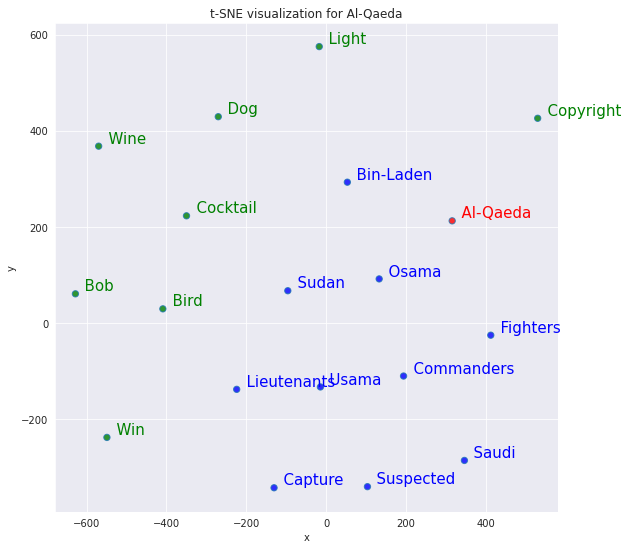

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'al-qaeda', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


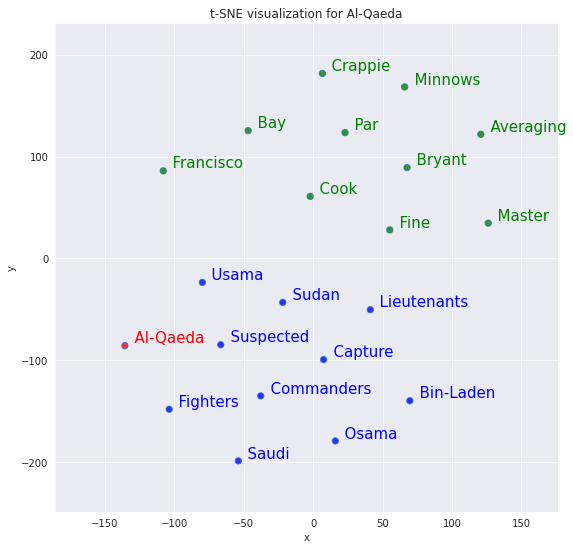

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'al-qaeda', [i[0] for i in model.wv.most_similar(negative=["al-qaeda"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "al-qaeda", [t[0] for t in model.wv.most_similar(positive=["al-qaeda"], topn=20)][10:])

### Bin-Laden

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


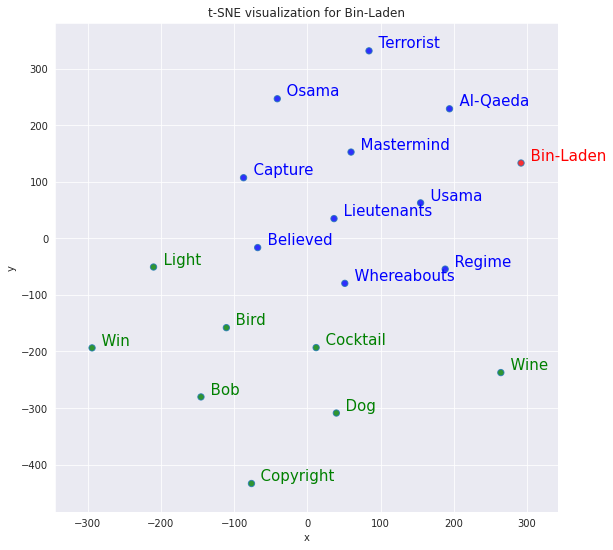

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'bin-laden', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


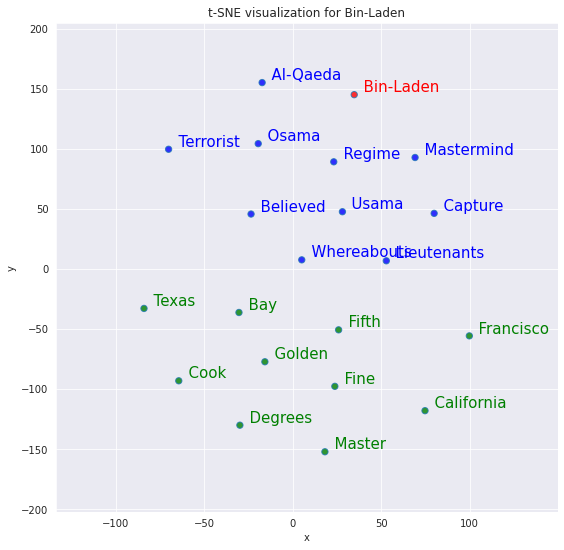

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'bin-laden', [i[0] for i in model.wv.most_similar(negative=["bin-laden"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "bin-laden", [t[0] for t in model.wv.most_similar(positive=["bin-laden"], topn=20)][10:])

### Twin-towers

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


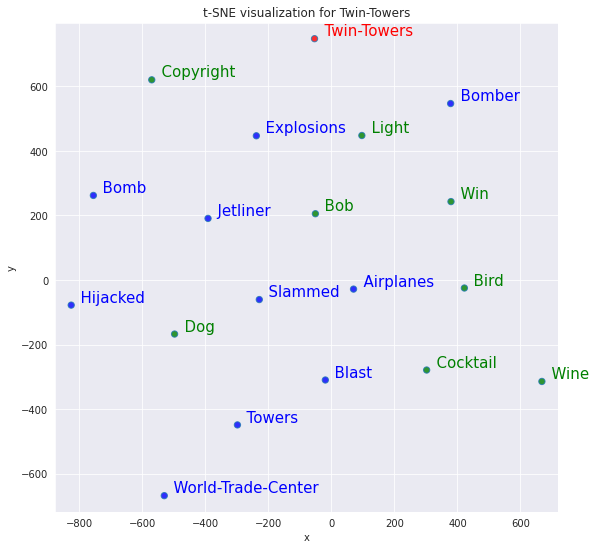

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'twin-towers', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


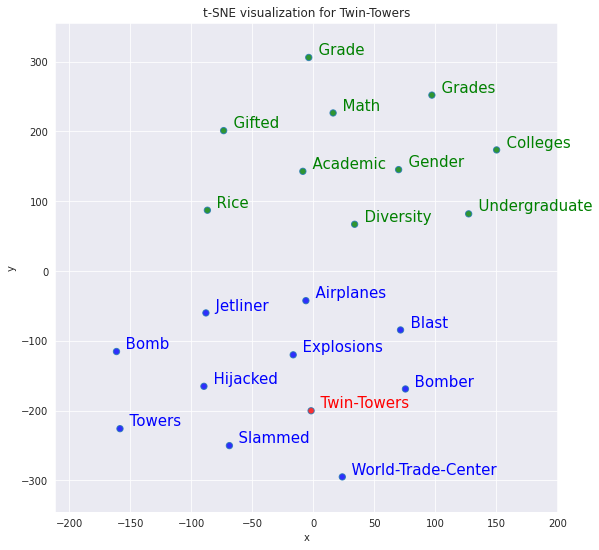

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'twin-towers', [i[0] for i in model.wv.most_similar(negative=["twin-towers"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "twin-towers", [t[0] for t in model.wv.most_similar(positive=["twin-towers"], topn=20)][10:])

### Airplane

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


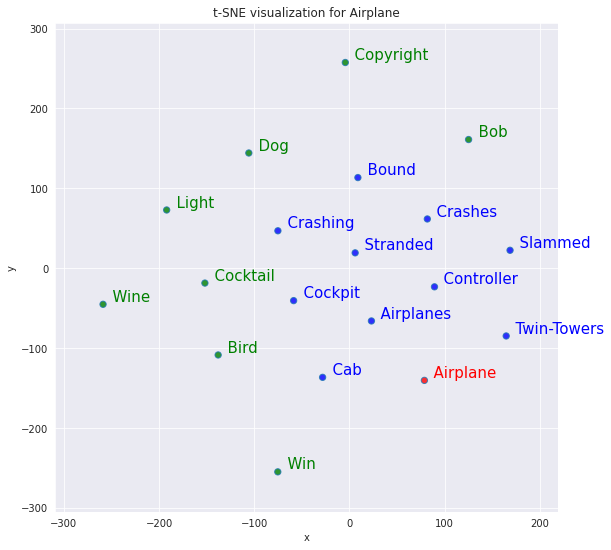

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'airplane', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


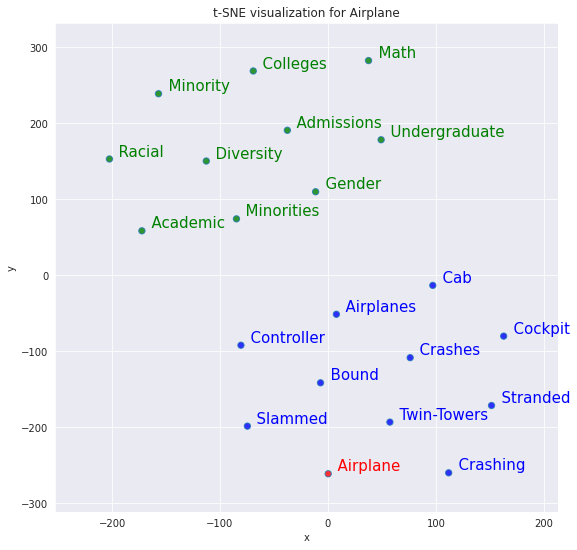

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'airplane', [i[0] for i in model.wv.most_similar(negative=["airplane"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "airplane", [t[0] for t in model.wv.most_similar(positive=["airplane"], topn=20)][10:])

### World-trade-center


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


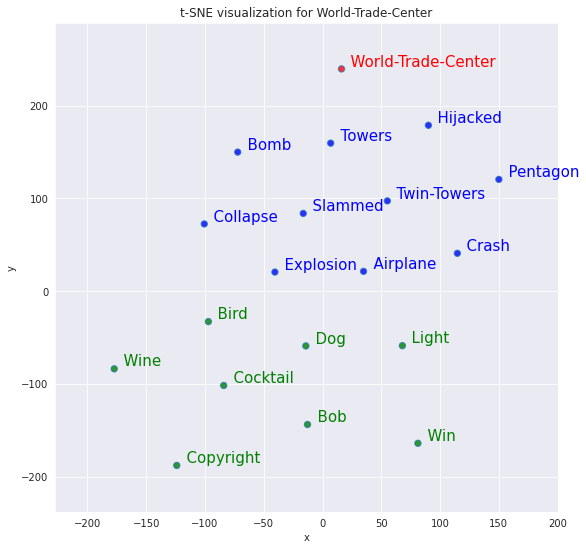

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'world-trade-center', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


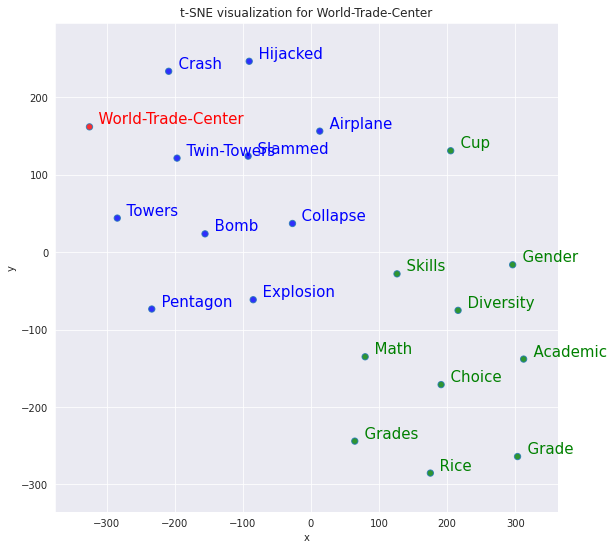

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'world-trade-center', [i[0] for i in model.wv.most_similar(negative=["world-trade-center"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "world-trade-center", [t[0] for t in model.wv.most_similar(positive=["world-trade-center"], topn=20)][10:])

### Jihad

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


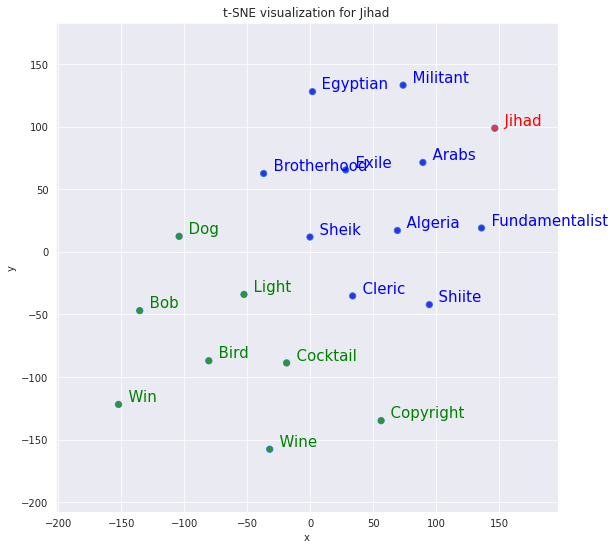

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'jihad', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


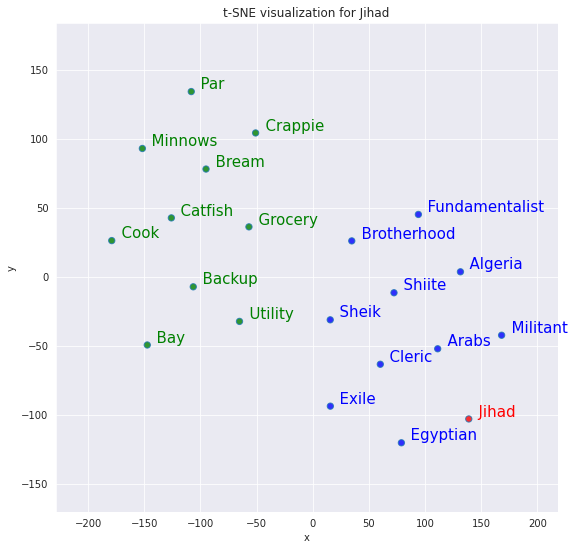

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'jihad', [i[0] for i in model.wv.most_similar(negative=["jihad"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "jihad", [t[0] for t in model.wv.most_similar(positive=["jihad"], topn=20)][10:])

## Most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']


embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

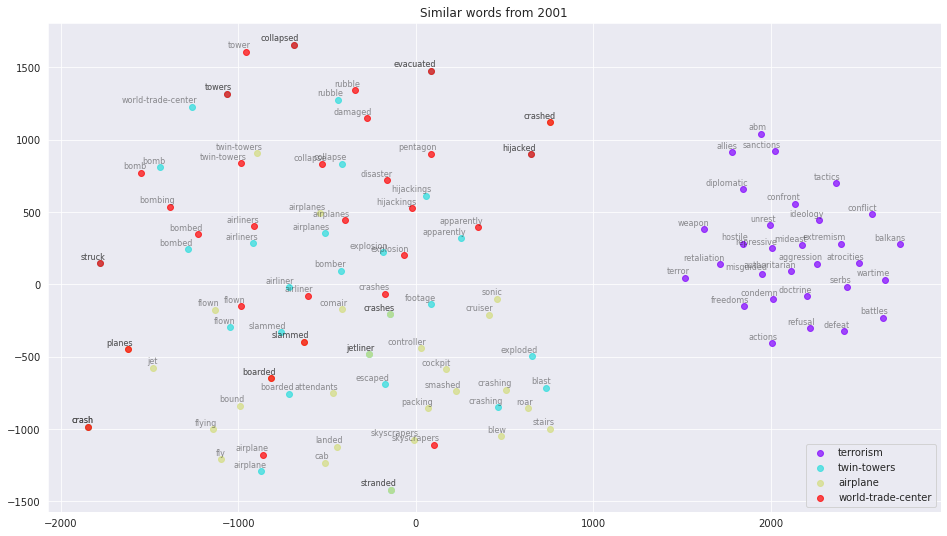

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from 2001', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words2001.png')

# Save text file for CADE

In [ ]:
listw2v = list(support_dict.values())

with open("file2001.txt", "w") as output:
  for i in range(len(listw2v)):
    for j in range(len(listw2v[i])):
      if j == 0:
        output.write("%s" % listw2v[i][j])
      else:
        output.write(" %s" % listw2v[i][j])
    output.write("\n")